In [5]:
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
import sys
import numpy as np
import time
import matplotlib
matplotlib.rcParams['contour.negative_linestyle']= 'solid'
import matplotlib.pyplot as plt
import matplotlib.patches as Polygon
import copy as cp
import cmocean

#+____IMPORT FESOM RELATET ROUTINES____________________________________________+
from set_inputarray  import *
from sub_fesom_mesh  import * 
from sub_fesom_data  import * 
from sub_fesom_plot  import *
from sub_fesom_moc   import *
from sub_climatology  import *
from colormap_c2c    import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM MESH ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# for more options look in set_inputarray.py
inputarray=set_inputarray()
inputarray['save_fig'        ] = True
inputarray['save_figpath'    ] = '/home/ollie/pscholz/figures/paper_fesom2.0/'
    
# set plot box for cyl projection (default: [-180,180,-90,90])
#inputarray['which_box'] = [0,360,-90,90] ; inputarray['mesh_focus']=180
# inputarray['which_box'] = [-180,180,-90,90]
inputarray['which_box'] = [-90,30,30,90]
#inputarray['which_box'] = [-90,35,20,85]
#inputarray['which_box'] = [-180,180,35,90]
#inputarray['which_box'] = [-180,180,-90,-50]

# set projection variable --> the lon/lat projection plot ranges are set via 
# inputarray['which_box'] = [lonmin,lonmax,latmin,latmax]
inputarray['proj'     ] = 'cyl' # 'ortho', 'cyl', 'npstere' , 'spstere'
inputarray['proj_lon' ] = -45 #only for ortho
inputarray['proj_lat' ] = 45 #only for ortho

inputarray['mesh_id'		 ] = 'COREv2'
inputarray['mesh_dir'		 ] = '/work/ollie/pscholz/mesh_fesom2.0/mesh_CORE2_final/'
try:
	mesh
except NameError:
	mesh = fesom_init_mesh(inputarray)
else:
	print(" --> ___FOUND FESOM MESH --> will use it!___________________________")
    


 --> ___FOUND FESOM MESH --> will use it!___________________________


     --> ../results/zstar/withoutPC-1/
     --> w
     --> calculate PMOC from vertical velocities via meridional bins
         elpased time:7.370107412338257s


<IPython.core.display.Javascript object>


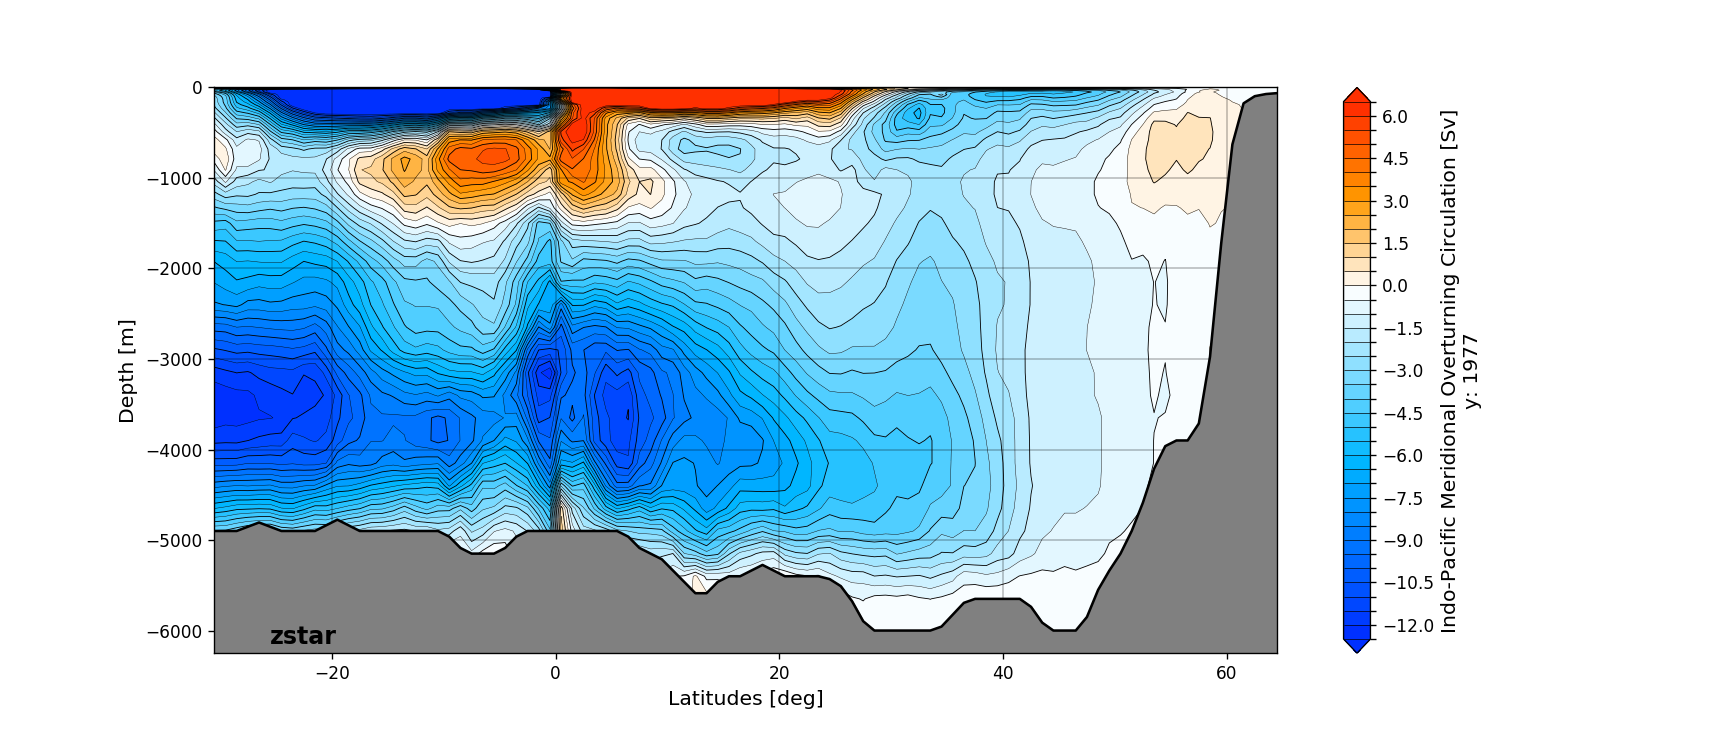

In [18]:
#____________________________________________________________________________________________________
# load vertical velocity data
data1 		 	= fesom_data(inputarray) 
data1.descript  = 'zstar'
data1.path      = '../results/'+data1.descript+'/withoutPC-1/'
# data1.descript  = 'test_pgf'
# data1.path      = '../results/'+data1.descript+'/'
data1.var 		= 'w'
#data1.year		= [1998,2007]
data1.year		= [1977,1977]
data1.cmap      = 'blue2red'
data1.month		= [1,2,3,4,5,6,7,8,9,10,11,12]
fesom_load_data_horiz(mesh,data1,do_output=False)

#____________________________________________________________________________________________________
#select XMOC
which_moc = 'pmoc'

#____________________________________________________________________________________________________
# calc XMOC
moc1,lat,bottom,elemidx  = calc_xmoc(mesh,data1,which_moc=which_moc,out_elemidx=True)

#____________________________________________________________________________________________________
# plot XMOC
fig,ax=plot_xmoc(lat,mesh.zlev,moc1,bottom=bottom,which_moc=which_moc,str_descript=data1.descript,str_time=data1.str_time)

#____________________________________________________________________________________________________
# save XMOC
# if inputarray['save_fig']==True:
#     print(' --> save figure: png')
#     str_times= data1.str_time.replace(' ','').replace(':','') 
#     sfname = 'plot_'+data1.descript+'_'+which_moc+'_'+str_times+'.png'
#     sdname = inputarray['save_figpath'] 
#     plt.savefig(sdname+sfname, \
#        format='png', dpi=600, \
#        bbox_inches='tight', pad_inches=0,\
#        transparent=True,frameon=True)
    

In [32]:
data2 = cp.deepcopy(data1)
data2.descript  = 'zlevel'
data2.path      = '../results/'+data2.descript+'/withoutPC-3/'
fesom_load_data_horiz(mesh,data2,do_output=False)
moc2,lat,bottom        =calc_xmoc(mesh,data2,which_moc=which_moc,in_elemidx=elemidx)

data3 = cp.deepcopy(data1)
data3.descript  = 'zstar'
data3.path      = '../results/'+data3.descript+'/withoutPC-3/'
fesom_load_data_horiz(mesh,data3,do_output=False)
moc3,lat,bottom        = calc_xmoc(mesh,data3,which_moc=which_moc,in_elemidx=elemidx)

     --> ../results/zlevel/withoutPC-3/
     --> w
     --> calculate AMOC2 from vertical velocities via meridional bins
         elpased time:0.5292108058929443s
     --> ../results/zstar/withoutPC-3/
     --> w
     --> calculate AMOC2 from vertical velocities via meridional bins
         elpased time:0.5411770343780518s


<IPython.core.display.Javascript object>


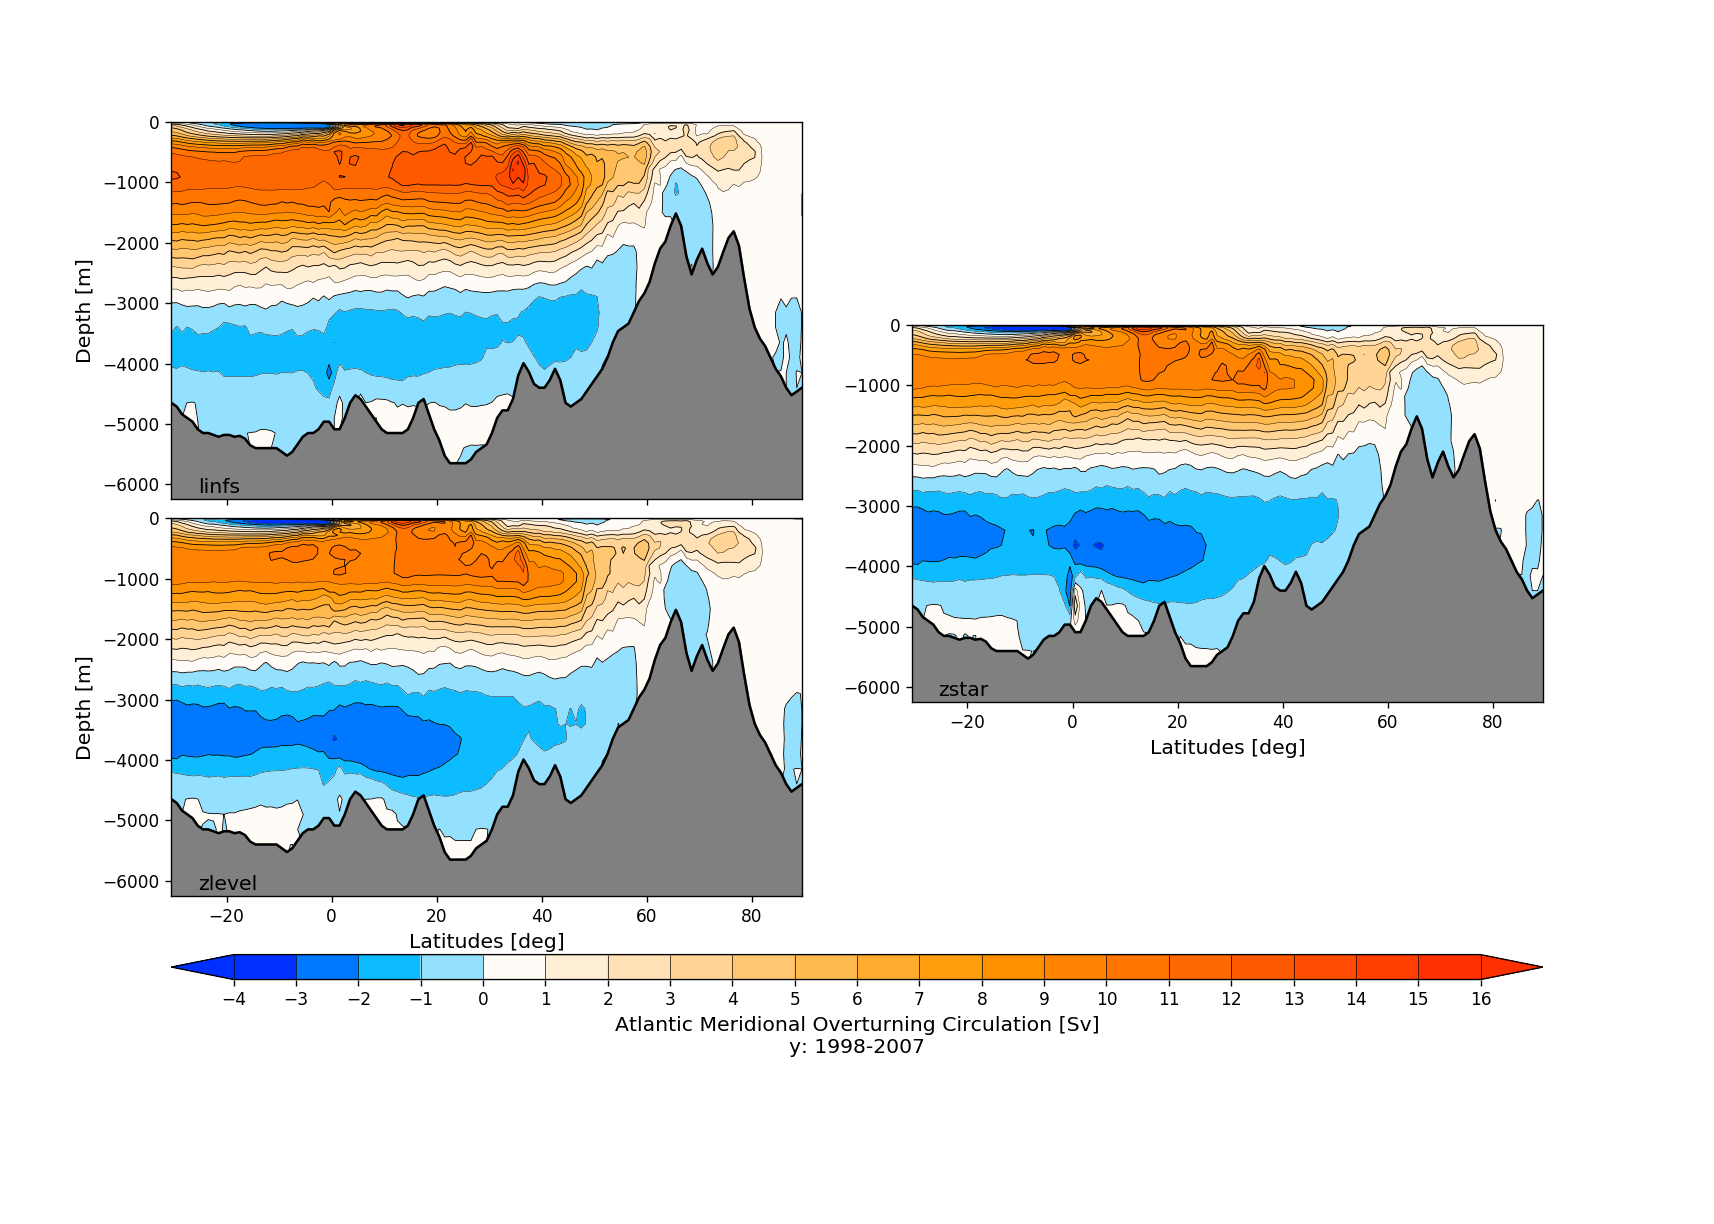

-3.25885531935 15.2471422732 0.0
 --> save figure: png


In [33]:
# fig= plt.figure(figsize=[14,6])
fig= plt.figure(figsize=[14,10])
resolution = 'c'
fsize = 10
txtx, txty = lat[0]+5,mesh.zlev[-1]+100
#+_________________________________________________________________________+
#| set minimum, maximum and reference values for the creation of the       |
#| adjustable colormap                                                     |
#+_________________________________________________________________________+
cnumb = 15; # minimum number of colors
cmin1,cmax1 = moc1[np.where(mesh.zlev<=-500)[0][0]::,:].min(),moc1[np.where(mesh.zlev<=-500)[0][0]::,:].max()
cmin2,cmax2 = moc2[np.where(mesh.zlev<=-500)[0][0]::,:].min(),moc2[np.where(mesh.zlev<=-500)[0][0]::,:].max()
cmin3,cmax3 = moc3[np.where(mesh.zlev<=-500)[0][0]::,:].min(),moc3[np.where(mesh.zlev<=-500)[0][0]::,:].max()
cmin,cmax,cref = np.min([cmin1,cmin2,cmin3]),np.max([cmax1,cmax2,cmax3]),0.0
print(cmin,cmax,cref)
cmap0,clevel = colormap_c2c(cmin,cmax,cref,cnumb,data1.cmap)
cbot = [0.5,0.5,0.5]
do_drawedges=True
if clevel.size>30: do_drawedges=False

#___________________________________________________________________________    
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9,wspace=0.175, hspace=0.05)

#+_________________________________________________________________________+
#| plot AXES1                                                              |
#+_________________________________________________________________________+
ax1 = plt.subplot(2,2,1)    
data_plot = moc1
data_plot[data_plot<clevel[ 0]]  = clevel[ 0]+np.finfo(np.float32).eps
data_plot[data_plot>clevel[-1]] = clevel[-1]-np.finfo(np.float32).eps
hp1=plt.contourf(lat,mesh.zlev,data_plot,levels=clevel,antialiased=False,extend='both',cmap=cmap0)
plt.contour(lat,mesh.zlev,data_plot,levels=clevel,colors='k',linewidths=[0.5,0.25],antialised=True)
ax1.plot(lat,bottom,color='k')
ax1.fill_between(lat, bottom, mesh.zlev[-1],color=cbot,zorder=2)#,alpha=0.95)
#__________________________________________________________________________
for im in ax1.get_images():
    im.set_clim(clevel[0],clevel[-1])
#__________________________________________________________________________    
ax1.text(txtx,txty,data1.descript , fontsize=12, horizontalalignment='left')
# ax1.grid(color='k', linestyle='-', linewidth=0.25,alpha=1.0)
ax1.set_xticklabels([])
# ax1.set_xlabel('Latitudes [deg]',fontsize=12)
ax1.set_ylabel('Depth [m]',fontsize=12)
#+_________________________________________________________________________+
#| plot AXES2                                                              |
#+_________________________________________________________________________+
ax2 = plt.subplot(2,2,3)    
data_plot = moc2
data_plot[data_plot<clevel[ 0]]  = clevel[ 0]+np.finfo(np.float32).eps
data_plot[data_plot>clevel[-1]] = clevel[-1]-np.finfo(np.float32).eps
hp1=plt.contourf(lat,mesh.zlev,data_plot,levels=clevel,antialiased=False,extend='both',cmap=cmap0)
plt.contour(lat,mesh.zlev,data_plot,levels=clevel,colors='k',linewidths=[0.5,0.25],antialised=True)
ax2.plot(lat,bottom,color='k')
ax2.fill_between(lat, bottom, mesh.zlev[-1],color=cbot,zorder=2)#,alpha=0.95)
#__________________________________________________________________________
for im in ax2.get_images():
    im.set_clim(clevel[0],clevel[-1])
#__________________________________________________________________________   
ax2.text(txtx,txty,data2.descript , fontsize=12, horizontalalignment='left')
# ax2.grid(color='k', linestyle='-', linewidth=0.25,alpha=1.0)
ax2.set_xlabel('Latitudes [deg]',fontsize=12)
ax2.set_ylabel('Depth [m]',fontsize=12)
    
#+_________________________________________________________________________+
#| plot AXES3                                                              |
#+_________________________________________________________________________+
ax3 = plt.subplot(2,2,(2,4))    
data_plot = moc3
data_plot[data_plot<clevel[ 0]]  = clevel[ 0]+np.finfo(np.float32).eps
data_plot[data_plot>clevel[-1]] = clevel[-1]-np.finfo(np.float32).eps
hp3=plt.contourf(lat,mesh.zlev,data_plot,levels=clevel,antialiased=False,extend='both',cmap=cmap0)
plt.contour(lat,mesh.zlev,data_plot,levels=clevel,colors='k',linewidths=[0.5,0.25],antialised=True)
ax3.plot(lat,bottom,color='k')
ax3.fill_between(lat, bottom, mesh.zlev[-1],color=cbot,zorder=2)#,alpha=0.95)
#__________________________________________________________________________
for im in ax3.get_images():
    im.set_clim(clevel[0],clevel[-1])
#__________________________________________________________________________    
ax3.text(txtx,txty,data3.descript , fontsize=12, horizontalalignment='left')
# ax3.grid(color='k', linestyle='-', linewidth=0.25,alpha=1.0)
ax3.set_xlabel('Latitudes [deg]',fontsize=12)
# ax3.set_ylabel('Depth [m]',fontsize=12)
fig.canvas.draw()

#+_________________________________________________________________________+
#| plot second colorbar____                                                |
#+_________________________________________________________________________+
cbar2 = plt.colorbar(hp3,ax=[ax1,ax2,ax3],orientation='horizontal',\
                     ticks=clevel,drawedges=True,extend='neither',\
                     extendrect=False,extendfrac='auto',aspect=50, pad=0.06)
if which_moc=='gmoc':
    cbar2.set_label('Global Meridional Overturning Circulation [Sv]'+'\n'+data1.str_time, size=fsize+2)
elif which_moc=='amoc' or which_moc=='amoc2':
    cbar2.set_label('Atlantic Meridional Overturning Circulation [Sv]'+'\n'+data1.str_time, size=fsize+2)
elif which_moc=='pmoc':
    cbar2.set_label('Indo-Pacific Meridional Overturning Circulation [Sv]'+'\n'+data1.str_time, size=fsize+2)
elif which_moc=='imoc':
    cbar2.set_label('Indo Meridional Overturning Circulation [Sv]'+'\n'+data1.str_time, size=fsize+2)

ncbar_l=len(cbar2.ax.get_xticklabels()[:])
idx_cref = np.where(clevel==cref)[0]
idx_cref = np.asscalar(idx_cref)
nmax_cbar_l = 20
nstep = ncbar_l/nmax_cbar_l
nstep = np.int(np.floor(nstep))
if nstep==0: nstep=1
plt.setp(cbar2.ax.get_xticklabels()[:], visible=False)
plt.setp(cbar2.ax.get_xticklabels()[idx_cref::nstep], visible=True)
plt.setp(cbar2.ax.get_xticklabels()[idx_cref::-nstep], visible=True)   


#+_________________________________________________________________________+
#| Adapt Colorbar positions                                                |
#+_________________________________________________________________________+
fig.canvas.draw()
ax3_pos = ax3.get_position();
ax2_pos = ax2.get_position();
ax1_pos = ax3.get_position();
ax3.set_position([ax3_pos.x0,ax2_pos.y0+(ax1_pos.y1-ax2_pos.y0)*0.25,ax2_pos.width,ax2_pos.height])
fig.canvas.draw()

#+_________________________________________________________________________+
#| SAVE FIGURE                                                             |
#+_________________________________________________________________________+
if inputarray['save_fig']==True:
   print(' --> save figure: png')
   str_times= data1.str_time.replace(' ','').replace(':','')
   sfname = 'plot_paperfig'+'_'+which_moc+'_'+str_times+'.png'
   sdname = inputarray['save_figpath'] 
   plt.savefig(sdname+sfname, \
       format='png', dpi=600, \
       bbox_inches='tight', pad_inches=0,\
       transparent=True,frameon=True)
#________________________________________________________________________

plt.show(block=False)